<a href="https://colab.research.google.com/github/Intanpratiwiiii/Intann/blob/main/ProjectUASML_Intan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Study Kasus**
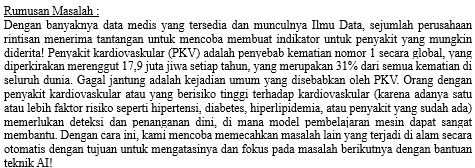

# **2. Tujuan Machine Learning**
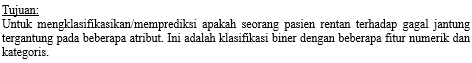

# **3. Dataset : Heart Failure Prediction Dataset**
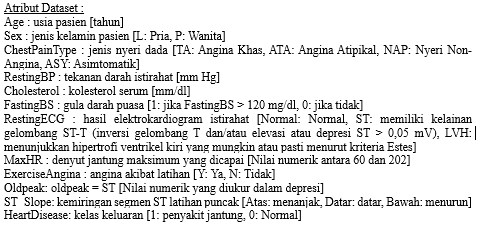

# 4. **Exploratory Data Analysis (EDA)**
- deskripsi dataset
- data understanding,
- data characteristic Eda yang digunakan
- kesimpulan dari hasil visualisasi graphic

## Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = pd.read_csv('heart.csv')
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

## Data Understanding

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Metode data.info() mengembalikan informasi tentang DataFrame termasuk tipe data indeks dan kolom, jumlah nilai bukan nol (non-null), serta penggunaan memori.

Kita melihat bahwa kita memiliki dataset terdiri dari 918 observasi (baris) dan 12 variabel (kolom). Semua kolom memiliki 918 nilai non-null, artinya tidak ada nilai yang hilang (missing value) di dataset ini.

Tipe data kolom terdiri dari:

1. int64 sebanyak 6 kolom

2. float64 sebanyak 1 kolom

3. object sebanyak 5 kolom (biasanya berisi data kategori atau teks)

4. Penggunaan memori dari DataFrame ini adalah sekitar 86.2+ KB.

In [20]:
data.shape

(918, 12)

In [21]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [22]:
data.describe().T

count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00

Dengan menggunakan metode data.describe().T, kita bisa melihat ringkasan statistik deskriptif untuk kolom-kolom numerik di dalam dataset.

Dari hasil tersebut, kita bisa melihat bahwa:

1. Usia (Age) minimum adalah 28 tahun dan maksimum 77 tahun, dengan rata-rata 53.51 tahun. Nilai median (50%) ada di 54 tahun, menunjukkan distribusi usia relatif seimbang.

2. Untuk RestingBP (tekanan darah saat istirahat), nilai minimumnya adalah 0 dan maksimum 200, yang cukup ekstrem. Nilai 0 di sini sepertinya tidak masuk akal dan mungkin perlu ditelusuri lebih lanjut saat tahap pembersihan data.

3. Cholesterol memiliki nilai minimum 0 dan maksimum 603, dengan rata-rata 198.80. Nilai 0 untuk kolesterol juga cukup mencurigakan dan bisa jadi data yang tidak tercatat atau salah input.

4. FastingBS (gula darah puasa) memiliki nilai minimum 0 dan maksimum 1, yang sesuai karena ini biasanya data kategorikal biner (0 = normal, 1 = tinggi).

5. MaxHR (detak jantung maksimum) bervariasi dari 60 hingga 202, dengan rata-rata 136.81.

6. Nilai Oldpeak (depresi ST segmen EKG) memiliki minimum -2.60 hingga maksimum 6.20, dengan nilai rata-rata 0.89.

7. HeartDisease sebagai target variabel, memiliki nilai minimum 0 dan maksimum 1, dengan rata-rata 0.55, artinya sekitar 55% data memiliki nilai 1 (positif penyakit jantung).

8. Selain itu, dengan melihat rentang kuartil (25%, 50%, 75%) dan nilai min-max, kita juga bisa mulai memahami apakah distribusi data miring (skewed) atau tidak. Misalnya, nilai Cholesterol dengan maksimum 603 jauh di atas kuartil ketiga (267), menunjukkan adanya kemungkinan outlier di data tersebut.

Catatan:
Untuk kolom bertipe objek (seperti Sex, ChestPainType, dll.), hasil describe() akan menampilkan informasi seperti jumlah data (count), jumlah nilai unik (unique), nilai yang paling sering muncul (top), dan frekuensi nilai tersebut (freq).



In [23]:
data.describe(include='object')

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

Dengan menggunakan metode data.describe(include='object'), kita bisa melihat ringkasan statistik deskriptif untuk kolom bertipe objek dalam dataset.

Dari hasil tersebut:

1. Kita melihat bahwa nilai yang paling sering muncul (top) untuk variabel Sex adalah 'M' (laki-laki), dan muncul sebanyak 725 kali dalam dataset.

2. Variabel ChestPainType memiliki 4 kategori unik, dengan kategori yang paling sering muncul adalah 'ASY' sebanyak 496 kali.

3. Variabel RestingECG memiliki 3 kategori unik, dan nilai yang paling sering muncul adalah 'Normal' sebanyak 552 kali.

4. Variabel ExerciseAngina terdiri dari 2 kategori unik, dengan nilai yang paling sering muncul adalah 'N' sebanyak 547 kali, artinya mayoritas tidak mengalami angina saat olahraga.

5. Variabel ST_Slope memiliki 3 kategori unik, dan nilai yang paling sering muncul adalah 'Flat' sebanyak 460 kali.


In [24]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

Selain itu, kita juga bisa melihat berapa nilai unik dalam variabel-variabel diskrit menggunakan metode .unique().

In [25]:
# Data Cleaning
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Saat menggabungkan metode .isnull() dengan .sum(), kita dapat menjumlahkan semua nilai yang hilang untuk setiap variabel.

Untungnya, tidak ada nilai yang hilang dalam kumpulan data ini.

In [26]:
data[data.duplicated]

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

Karena outputnya menampilkan nama-nama kolom tanpa ada baris data di bawahnya, artinya tidak ditemukan baris duplikat dalam dataset ini. Kalau ada duplikat, seharusnya akan muncul baris-baris yang memiliki isi data yang sama persis di semua kolom.

In [27]:
data.drop_duplicates(keep = 'first', inplace=True)

## Data Characteristic

In [28]:
# Membagi fitur menjadi Numerik dan Kategorikal
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


- Di sini, fitur kategoris didefinisikan jika
atribut memiliki kurang dari 6 elemen unik, selain itu merupakan fitur numerik.
- Pendekatan umum untuk pembagian fitur ini juga dapat didasarkan pada tipe data elemen atribut masing-masing.

Misalnya: tipe data = integer, atribut = fitur numerik; tipe data = string, atribut = fitur kategoris

- Untuk kumpulan data ini, karena jumlah fiturnya lebih sedikit, kita juga dapat memeriksa kumpulan data secara manual.

In [29]:
# Fitur Kategoris
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

- Membuat salinan mendalam dari kumpulan data asli dan label yang mengodekan data teks dari fitur kategoris.
- Modifikasi dalam kumpulan data asli tidak akan disorot dalam salinan mendalam ini.

Oleh karena itu, kami menggunakan salinan mendalam dari kumpulan data yang memiliki semua fitur yang diubah menjadi nilai numerik untuk tujuan visualisasi & pemodelan.

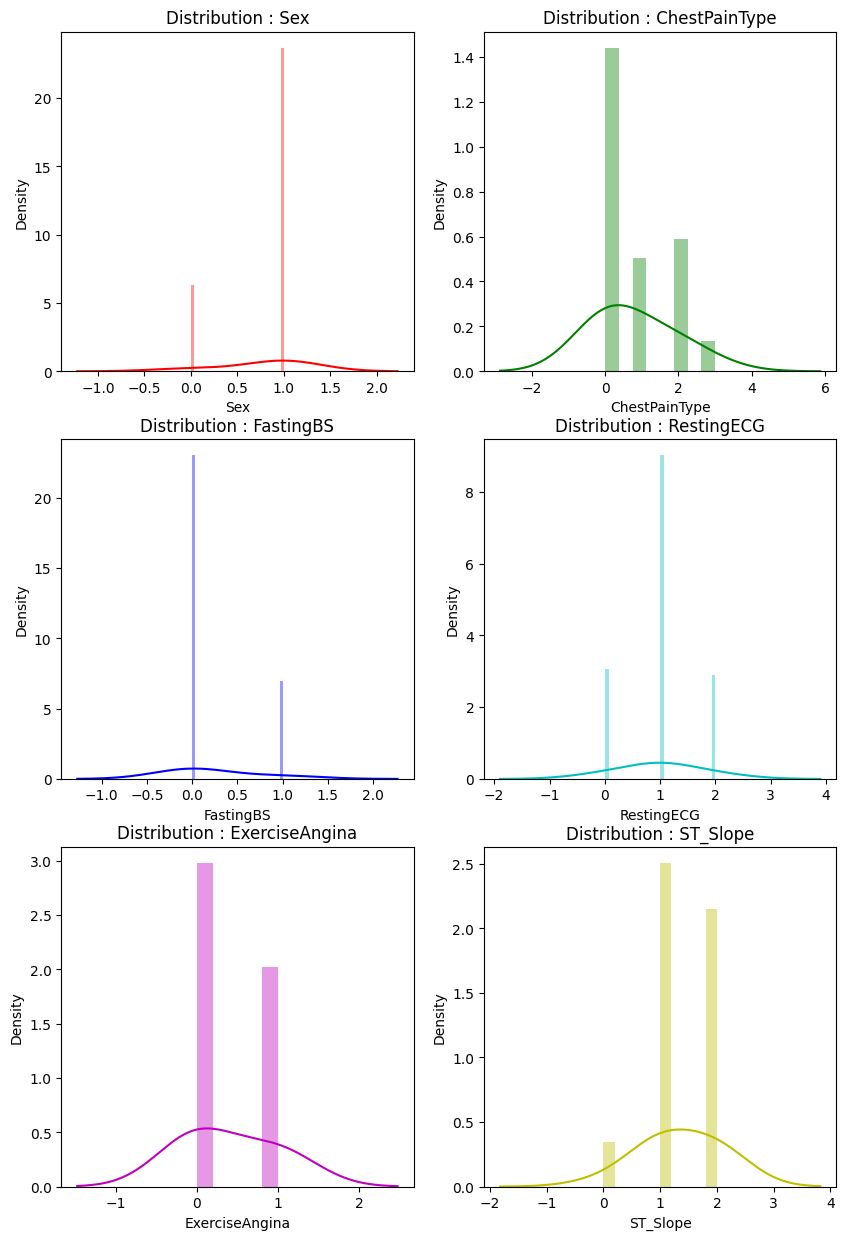

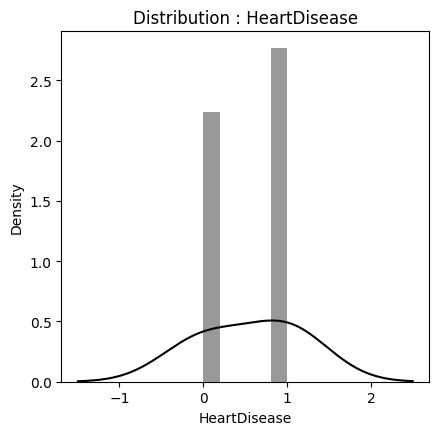

In [30]:
# Distribusi Fitur Kategori
# Tentukan daftar warna
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):

    plt.subplot(3,2,i+1)
    # Use the defined colors list
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[i % len(colors)]); # Use modulo to cycle through colors
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

plt.figure(figsize = (4.75,4.55))
# Use the defined colors list
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[(len(categorical_features) - 1) % len(colors)]) # Use modulo
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

Semua fitur kategorisnya mendekati Terdistribusi Normal.

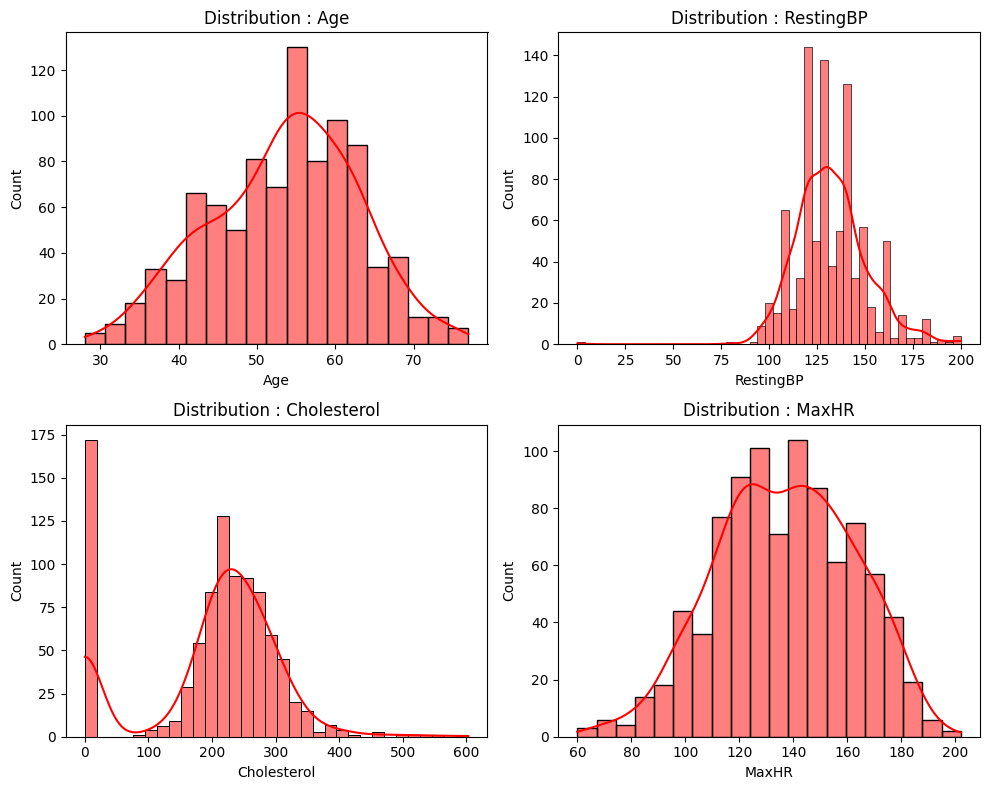

In [31]:
# Jumlah fitur numerik
num_features = len(numerical_features)

# Buat grid figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Warna
color = colors[0]

# Looping plot
for i, ax in enumerate(axes.flatten()):
    if i < num_features:
        # Bersihkan inf dan NaN
        clean_data = df1[numerical_features[i]].replace([np.inf, -np.inf], np.nan).dropna()

        sns.histplot(clean_data, kde=True, color=color, ax=ax)
        ax.set_title(f'Distribution : {numerical_features[i]}')
    else:
        fig.delaxes(ax)  # hapus axis kosong kalau jumlah fitur ganjil

# Rapihkan layout
plt.tight_layout()
plt.show()


- Distribusi data Oldpeak cenderung miring.
- Cholesterol memiliki distribusi data bimodal.

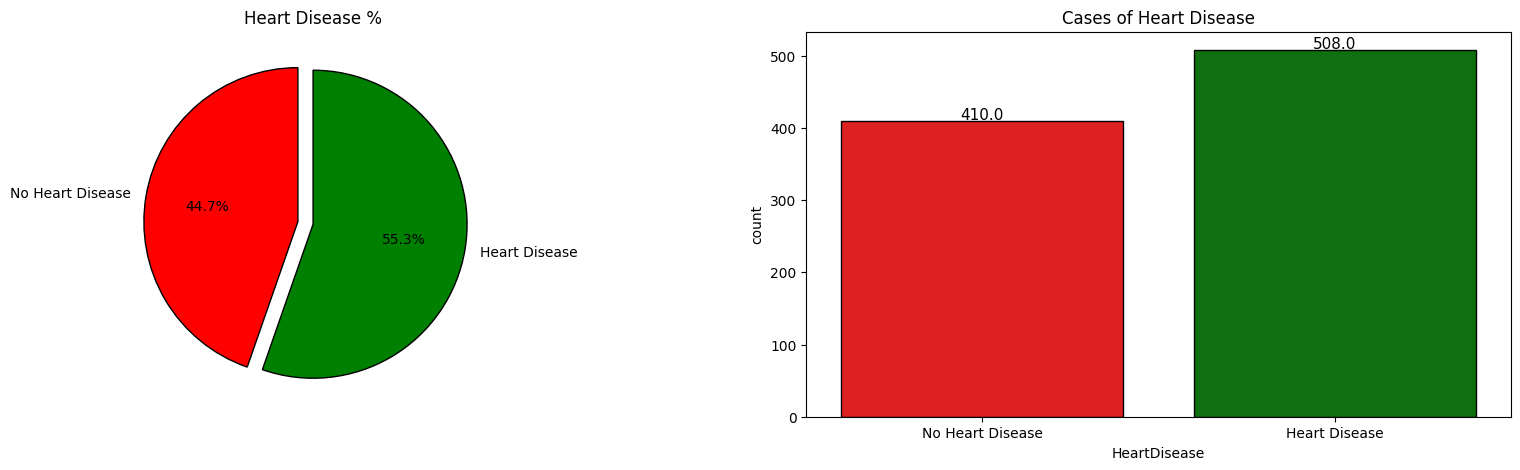

In [32]:
# Visualisasi Variabel Target (Penyakit Jantung)
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot(x='HeartDisease',data = data,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

Dilakukan visualisasi untuk variabel target HeartDisease menggunakan dua jenis plot: pie chart dan countplot.

Penjelasan:

1. Pie Chart (diagram lingkaran)
Visualisasi pertama (sebelah kiri) menggunakan plt.pie() untuk menampilkan persentase kasus:

- 55.3% data adalah pasien yang memiliki penyakit jantung.

- 44.7% data adalah pasien yang tidak memiliki penyakit jantung.

- Warna hijau menunjukkan kategori Heart Disease, dan warna merah menunjukkan No Heart Disease.

2. Countplot (diagram batang)
Visualisasi kedua (sebelah kanan) menggunakan sns.countplot() untuk menampilkan jumlah kasus secara absolut:

- Terdapat 508 pasien yang memiliki penyakit jantung.

- Terdapat 410 pasien yang tidak memiliki penyakit jantung.

- Setiap batang diberi label angka di atasnya menggunakan perulangan for yang menambahkan nilai count masing-masing.

3. Kesimpulan dari visualisasi ini:

- Jumlah pasien yang mengalami penyakit jantung dalam dataset ini sedikit lebih banyak dibandingkan yang tidak. Visualisasi ini penting untuk melihat distribusi target (imbalanced atau tidak), yang nantinya bisa berpengaruh dalam proses modeling.



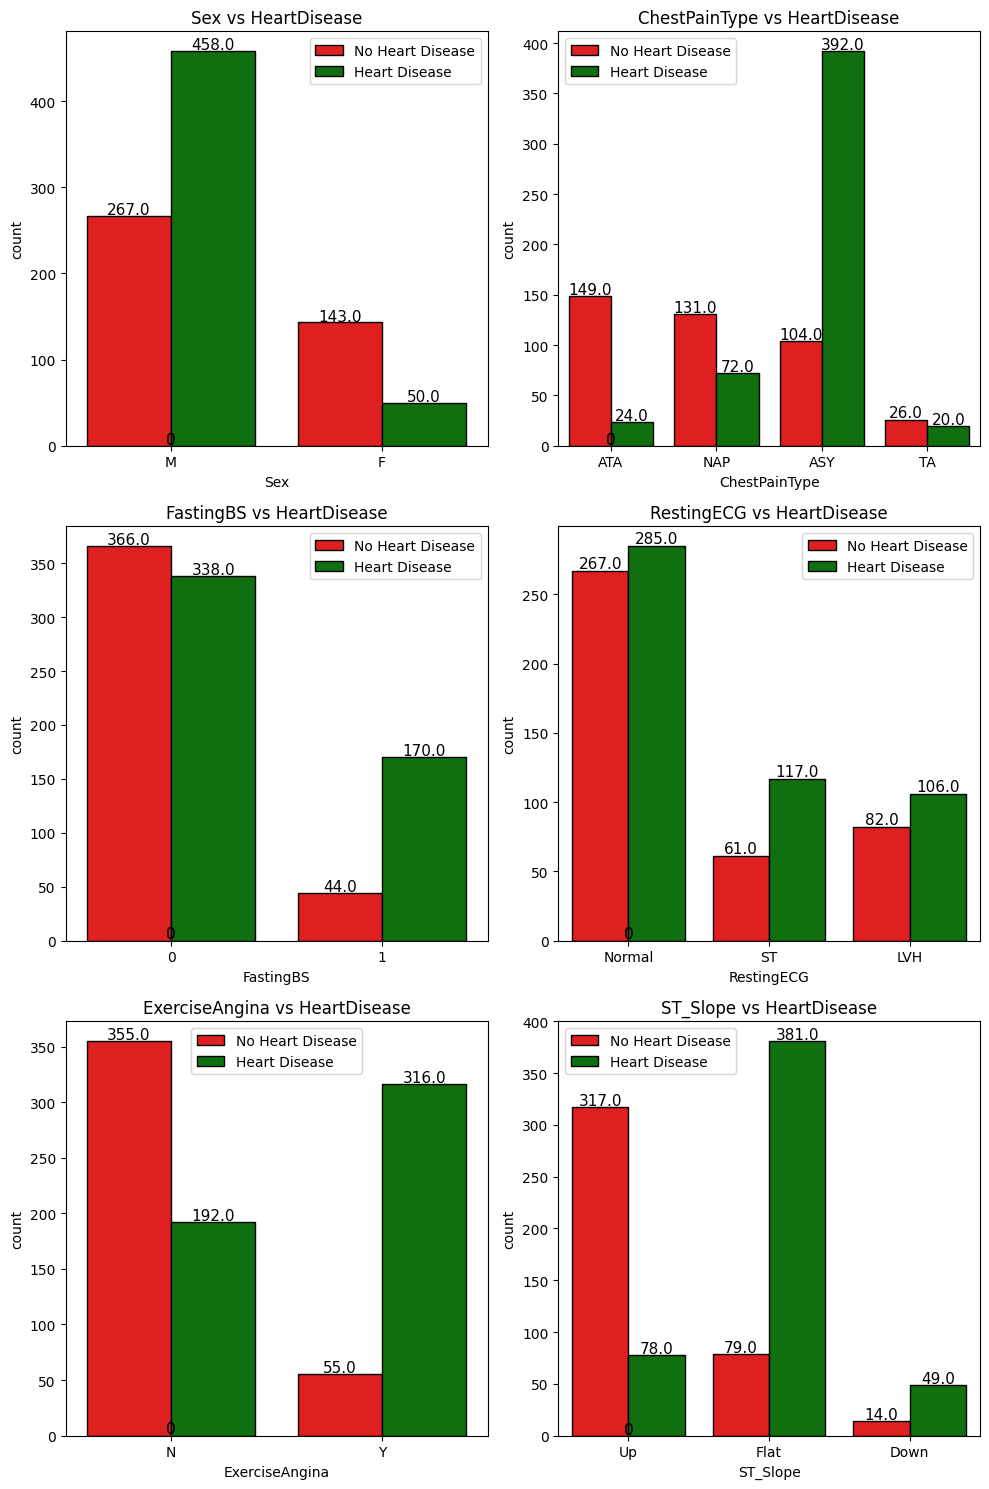

In [36]:
#Fitur Kategoris vs Variabel Target (Penyakit Jantung)
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=categorical_features[i], data = data, hue = "HeartDisease", palette = colors, edgecolor = 'black') # Use x= or y= for countplot
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

# Add plt.tight_layout() to improve spacing
plt.tight_layout()
plt.show()

- Populasi pria memiliki lebih banyak pasien penyakit jantung daripada yang tidak memiliki pasien penyakit jantung. Dalam kasus populasi wanita, pasien penyakit jantung lebih sedikit daripada yang tidak memiliki pasien penyakit jantung.
- Nyeri dada tipe ASY dengan tegas menunjukkan kemungkinan besar penyakit jantung.
Gula Darah Puasa itu rumit! Pasien yang didiagnosis dengan Gula Darah Puasa dan tidak memiliki Gula Darah Puasa memiliki pasien penyakit jantung yang signifikan.
- RestingECG tidak menyajikan kategori yang jelas yang menyoroti pasien penyakit jantung. Ketiga nilai tersebut terdiri dari sejumlah besar pasien penyakit jantung.
- Exercise Induced Engina jelas meningkatkan kemungkinan didiagnosis dengan penyakit jantung.
- Dengan nilai ST_Slope, kemiringan datar menunjukkan kemungkinan yang sangat tinggi untuk didiagnosis dengan penyakit jantung. Turun juga menunjukkan keluaran yang sama tetapi dalam beberapa titik data.

In [37]:
#Fitur Kategorial vs Kasus Penyakit Jantung Positif
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

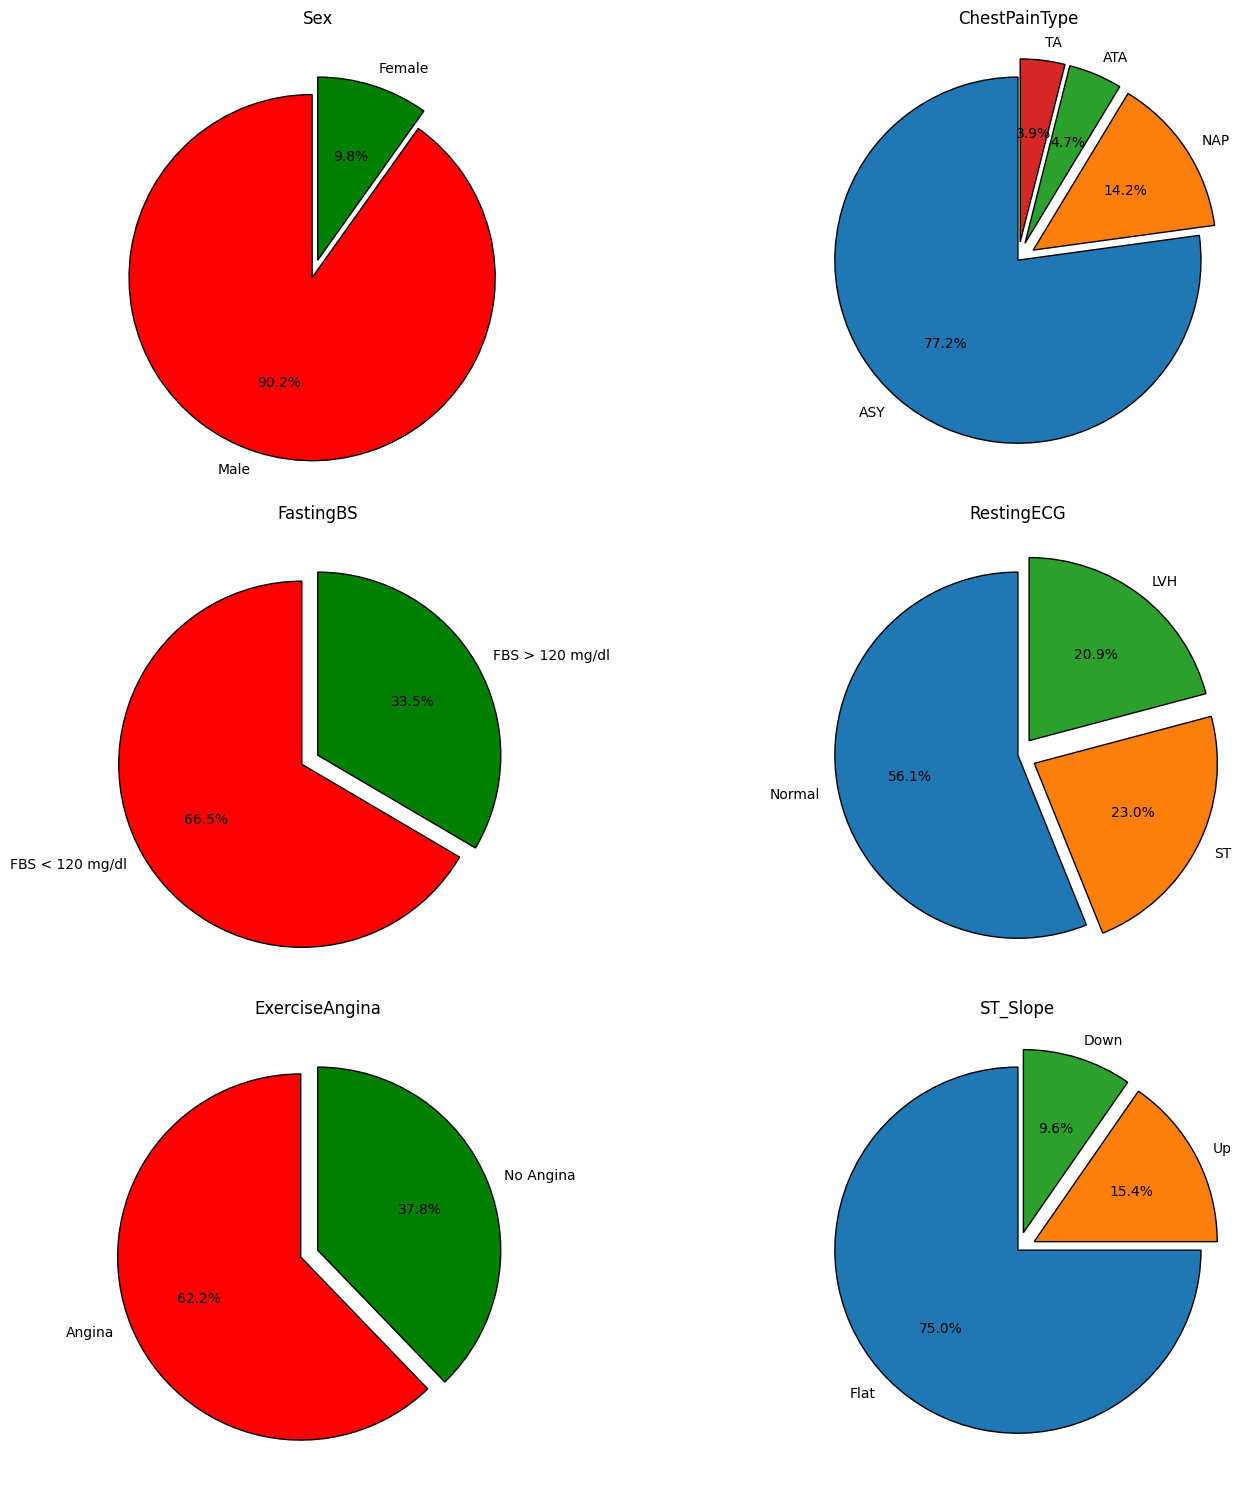

In [40]:
# Misal variabel data dan warna
colors = ['red', 'green']

# Buat subplot grid
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Pie chart 1
ax[0,0].pie(sex, labels=['Male','Female'], autopct='%1.1f%%', startangle=90, explode=(0.1,0), colors=colors,
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[0,0].set_title('Sex')
ax[0,0].axis('off')

# Pie chart 2
ax[0,1].pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=90, explode=(0,0.1,0.1,0.1),
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[0,1].set_title('ChestPainType')
ax[0,1].axis('off')

# Pie chart 3
ax[1,0].pie(fbs, labels=['FBS < 120 mg/dl','FBS > 120 mg/dl'], autopct='%1.1f%%', startangle=90, explode=(0.1,0), colors=colors,
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[1,0].set_title('FastingBS')
ax[1,0].axis('off')

# Pie chart 4
ax[1,1].pie(restecg, labels=['Normal','ST','LVH'], autopct='%1.1f%%', startangle=90, explode=(0,0.1,0.1),
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[1,1].set_title('RestingECG')
ax[1,1].axis('off')

# Pie chart 5
ax[2,0].pie(exang, labels=['Angina','No Angina'], autopct='%1.1f%%', startangle=90, explode=(0.1,0), colors=colors,
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[2,0].set_title('ExerciseAngina')
ax[2,0].axis('off')

# Pie chart 6
ax[2,1].pie(slope, labels=['Flat','Up','Down'], autopct='%1.1f%%', startangle=90, explode=(0,0.1,0.1),
             wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
ax[2,1].set_title('ST_Slope')
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

- Dari semua pasien penyakit jantung, 90% pasien adalah laki-laki.
- Jika berbicara tentang jenis nyeri dada, tipe ASY mendominasi dengan 77% yang mengarah ke penyakit jantung.
- Kadar Gula Darah Puasa < 120 mg/dl menunjukkan kemungkinan tinggi penyakit jantung.
- Untuk EKG Istirahat, kadar Normal menyumbang 56% kemungkinan penyakit jantung dibandingkan kadar LVH dan ST.
- Pendeteksian Angina Akibat Olahraga juga mengarah ke penyakit jantung.
- Jika berbicara tentang pembacaan ST_Slope, kadar Datar memegang bagian besar dengan 75% yang dapat membantu mendeteksi masalah jantung yang mendasarinya.

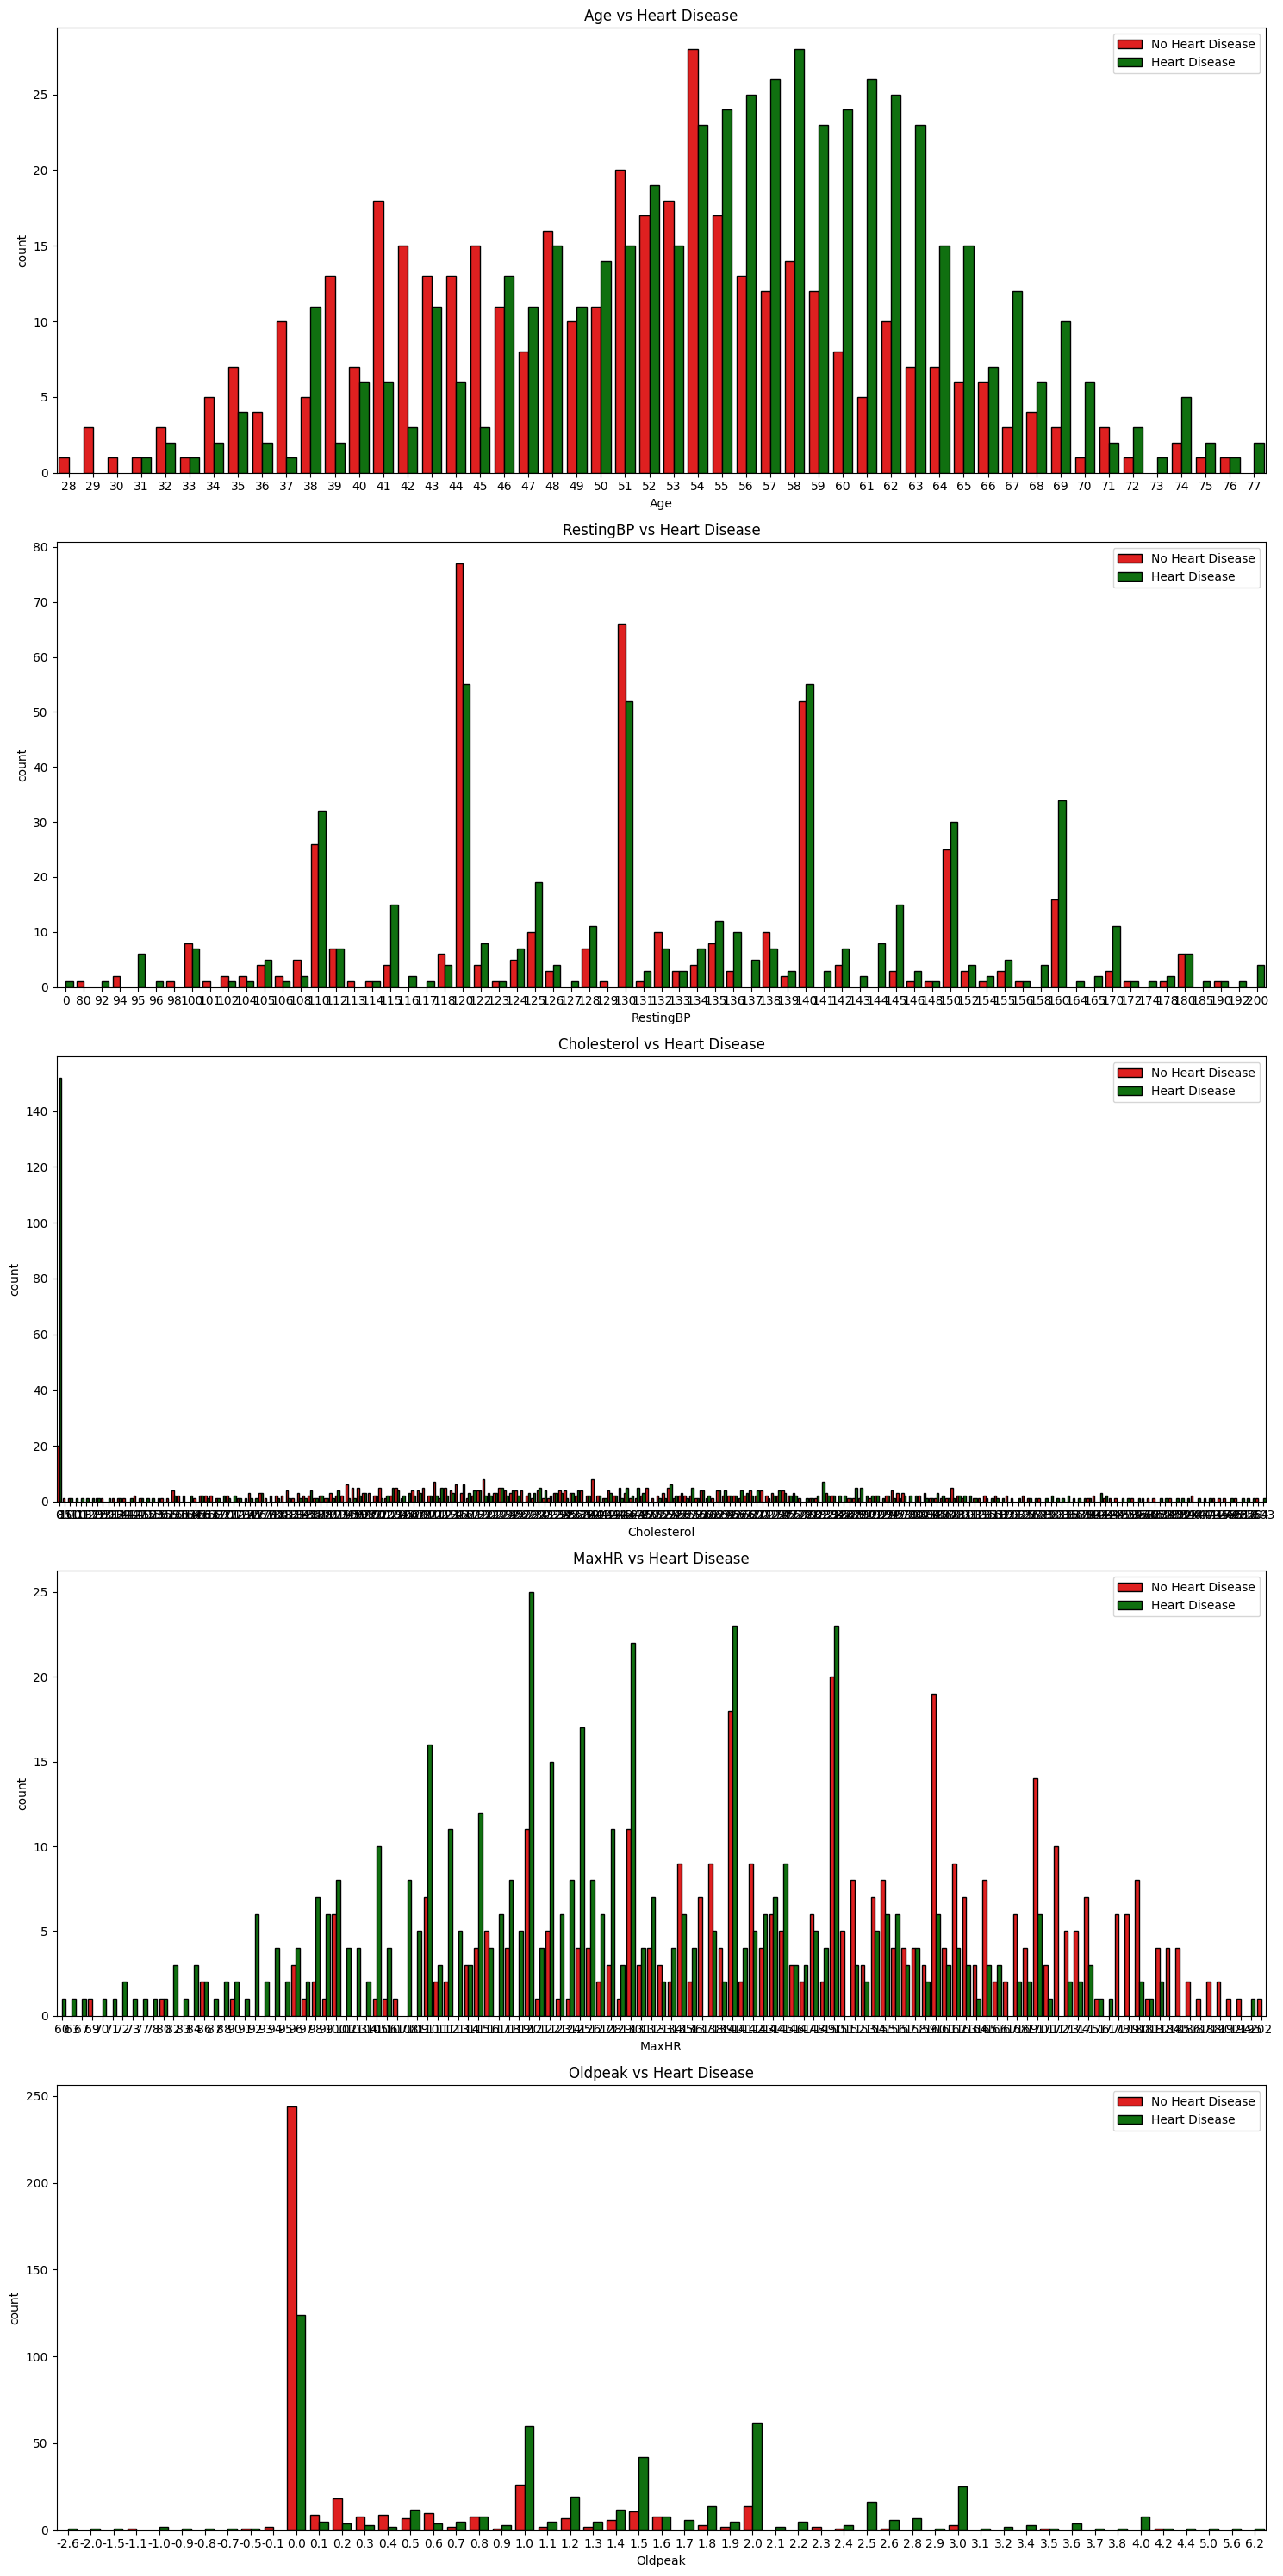

In [42]:
#Fitur Numerik vs Variabel Target (Penyakit Jantung)
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    # Explicitly set the x argument
    sns.countplot(x=numerical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

plt.tight_layout()
plt.show()

- Karena fitur-fitur numerik di atas memiliki terlalu banyak nilai unik, sulit untuk mendapatkan wawasan yang bermakna dari visualisasi langsung. Oleh sebab itu, fitur-fitur numerik tersebut — kecuali usia — diubah menjadi fitur kategoris agar visualisasi menjadi lebih sederhana dan mudah dipahami.
- Proses ini dilakukan dengan menskalakan nilai-nilai individu dari fitur-fitur numerik tersebut. Nilai-nilai ini dibagi dengan angka 5 atau 10, kemudian hasilnya dibulatkan atau dikategorikan ke dalam kelompok nilai tertentu yang mewakili rentang nilai tersebut. Konstanta penskalaan 5 dan 10 dipilih berdasarkan pengamatan terhadap data serta pertimbangan intuisi, agar hasil kategorisasi tetap relevan dan informatif.

In [43]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

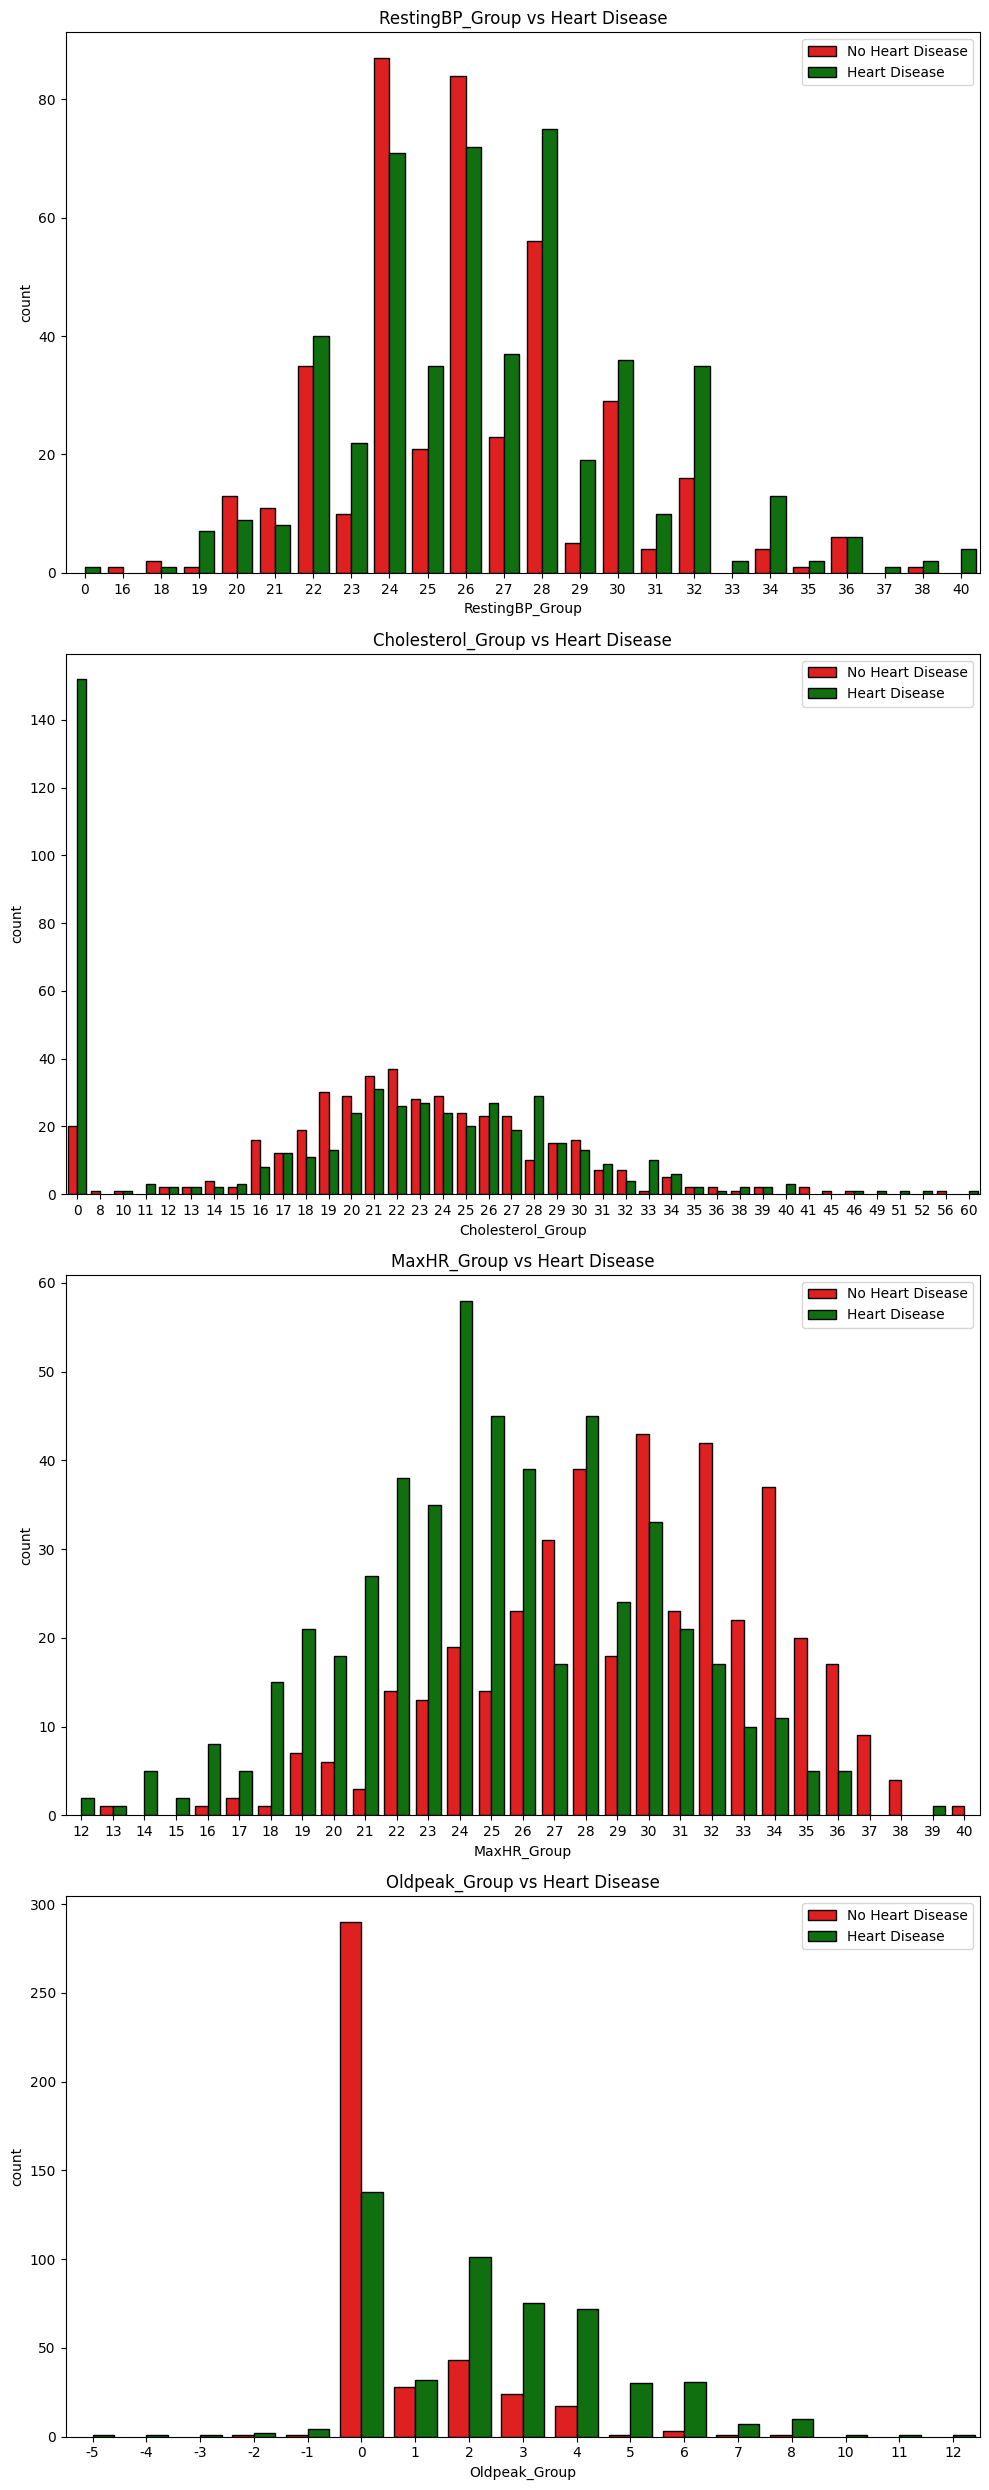

In [47]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    # Explicitly set the x argument to pass the column name
    sns.countplot(x=group_numerical_features[i],data = data,hue = "HeartDisease",palette = colors, edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

plt.tight_layout()
plt.show()

1. RestingBP_Group:
Tekanan darah istirahat tinggi (di atas 30) lebih banyak pada penderita penyakit jantung.

2. Cholesterol_Group:
Data didominasi nilai nol, tapi pada kolesterol tinggi (>30) lebih banyak penderita.

3. MaxHR_Group:
Penderita penyakit jantung cenderung punya detak jantung maksimum lebih rendah.

4. Oldpeak_Group:
Nilai Oldpeak tinggi (≥2) mayoritas diisi penderita penyakit jantung.

Kesimpulan:
Fitur-fitur ini setelah dikelompokkan mampu menunjukkan pola keterkaitan dengan penyakit jantung secara lebih jelas.

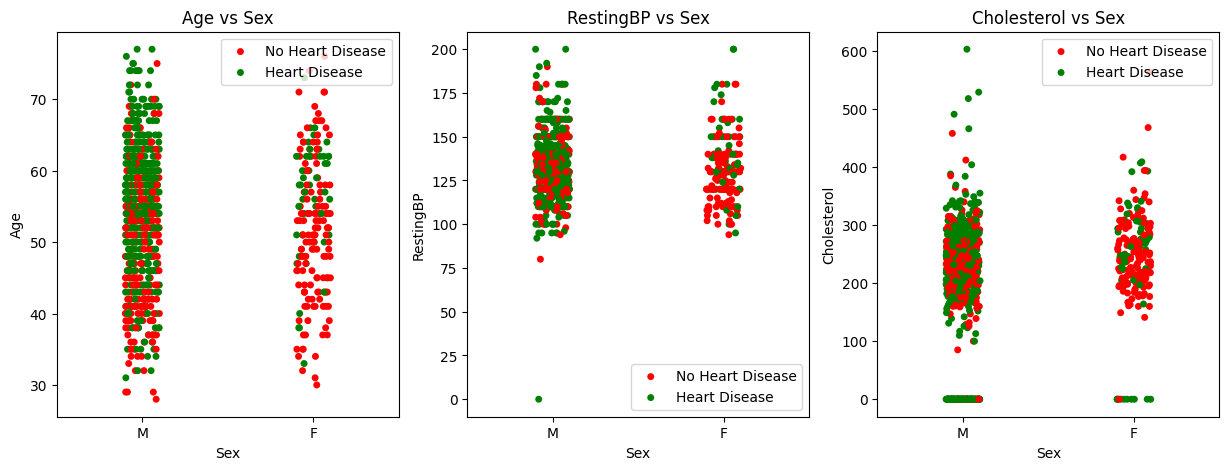

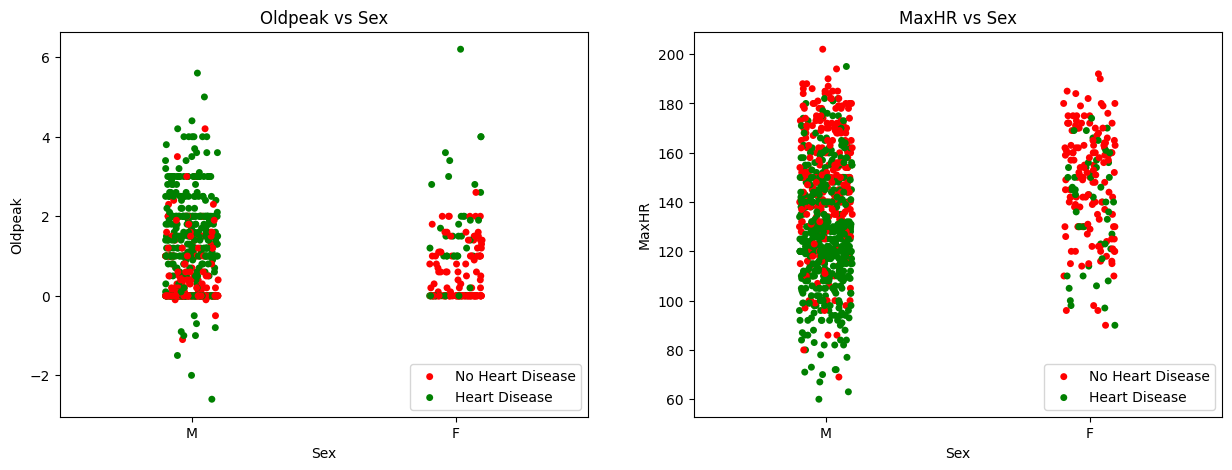

In [48]:
#Fitur numerik vs Fitur kategoris dengan variabel target (Penyakit jantung)
#Sex vs Fitur Numerik
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'Sex',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title);

- Pada populasi pria, kasus penyakit jantung terdeteksi hampir di seluruh rentang nilai fitur numerik. Khususnya, setelah usia 50 tahun, dengan nilai Oldpeak yang tinggi dan denyut jantung maksimum di bawah 140, jumlah kasus penyakit jantung meningkat signifikan. Sementara itu, jumlah data pada populasi
- wanita jauh lebih sedikit dibandingkan pria, sehingga sulit untuk menentukan rentang nilai tertentu yang berkaitan dengan penyakit jantung pada kelompok ini.

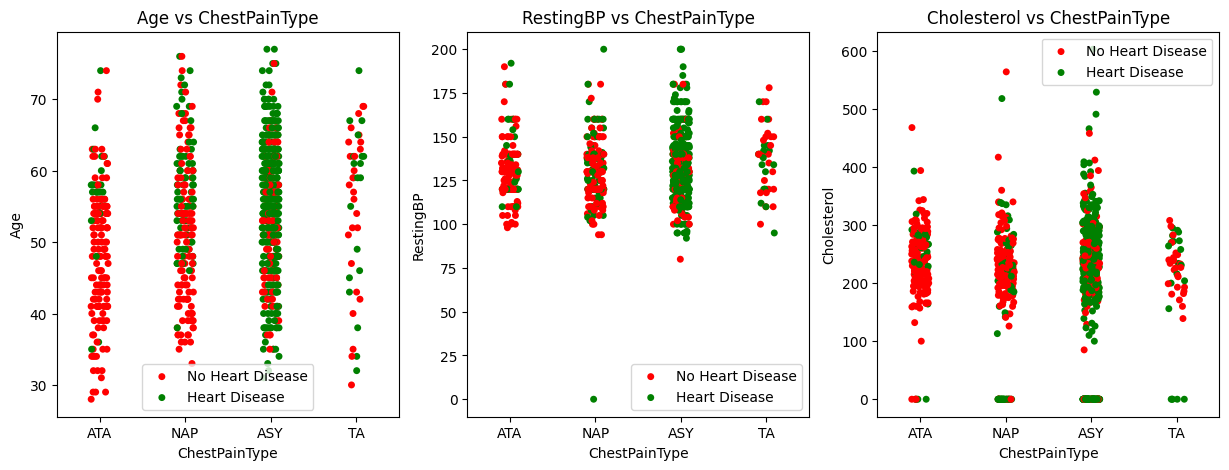

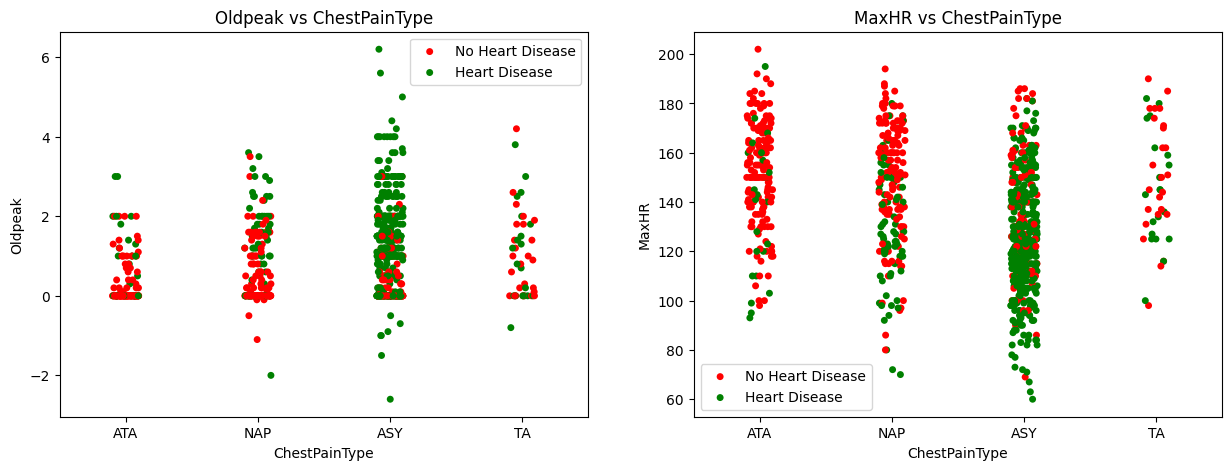

In [49]:
#ChestPainType vs Fitur Numerik
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title);

Tipe nyeri dada ASY merupakan yang paling dominan dibandingkan tipe nyeri dada lainnya di seluruh rentang fitur numerik.

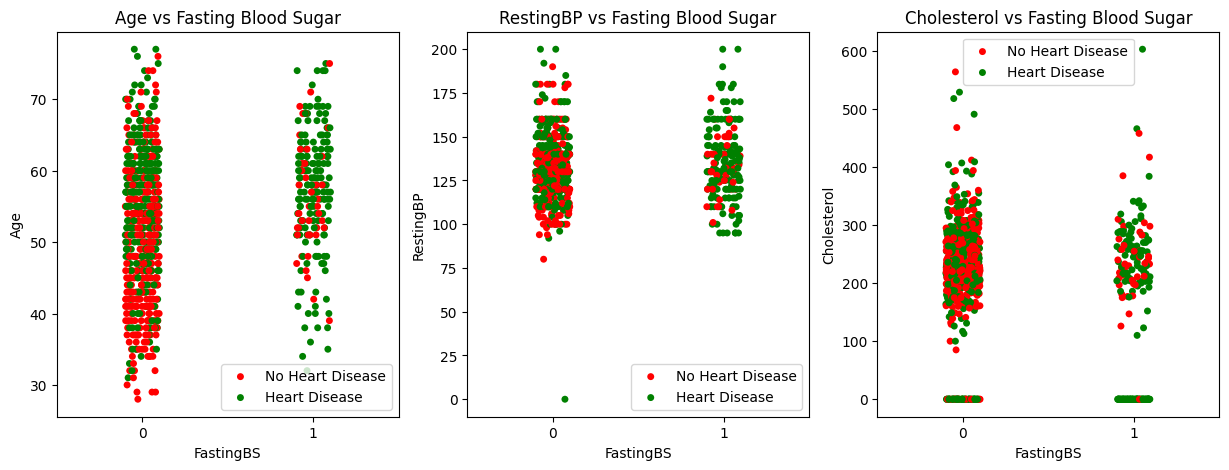

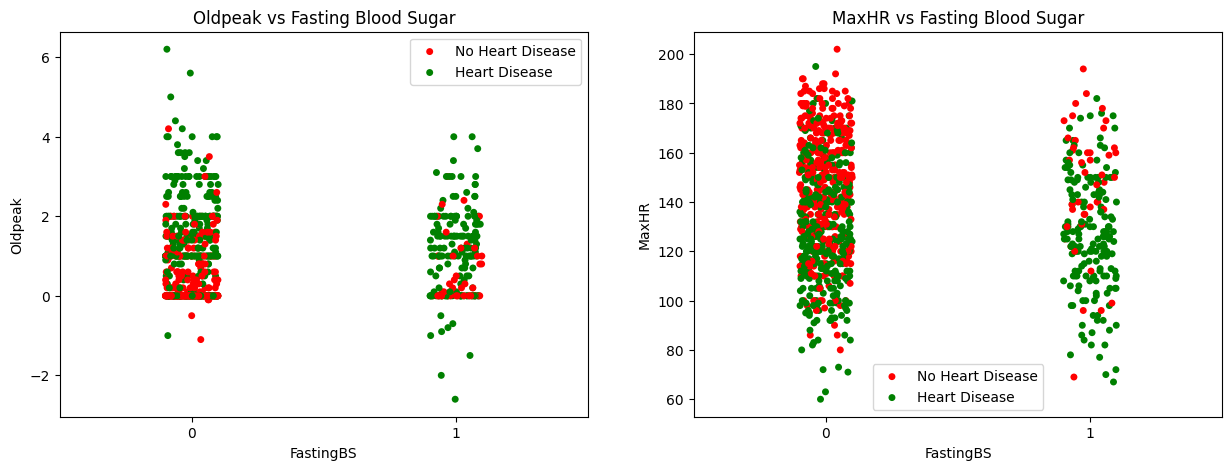

In [50]:
#FastingBS vs Fitur numerik
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

- Pada usia di atas 50 tahun, kasus penyakit jantung ditemukan di seluruh kelompok data, baik pasien dengan maupun tanpa riwayat Gula Darah Puasa.

- Pasien dengan Gula Darah Puasa dan tekanan darah istirahat di atas 100 cenderung memiliki lebih banyak kasus penyakit jantung dibandingkan mereka yang tidak.

- Kadar kolesterol tampaknya tidak memberikan pengaruh signifikan terhadap analisis hubungan antara Gula Darah Puasa dan penyakit jantung.

- Pasien tanpa riwayat Gula Darah Puasa, namun memiliki denyut jantung maksimum di bawah 130, menunjukkan kerentanan lebih tinggi terhadap penyakit jantung.

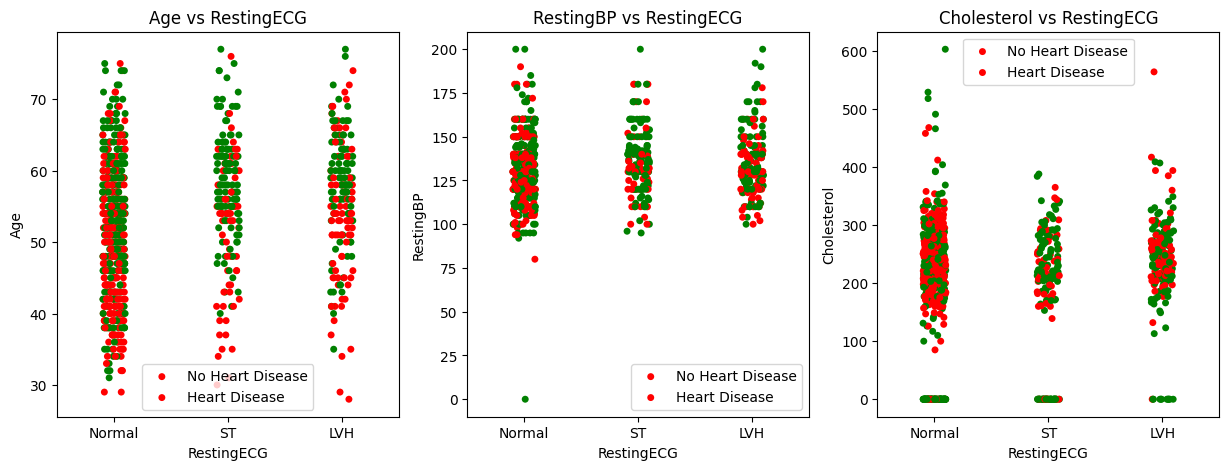

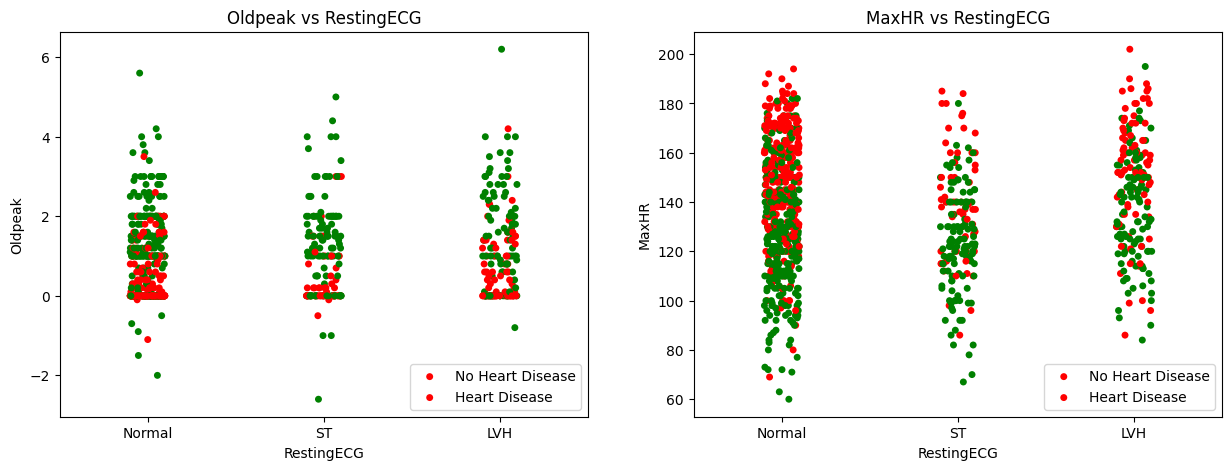

In [51]:
#RestingECG vs Fitur Numerik
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title);


- Penyakit jantung dengan kategori RestingECG Normal, ST, dan LVH mulai terdeteksi pada nilai masing-masing 30, 40, dan 40. Risiko penyakit jantung meningkat pada pasien berusia di atas 50 tahun, tanpa memandang kategori RestingECG.

- Kasus penyakit jantung muncul merata di berbagai nilai RestingBP dan kategori RestingECG.

- Kadar kolesterol dalam rentang 200–300, apabila disertai dengan hasil ST pada RestingECG, menunjukkan area dengan banyak pasien penderita penyakit jantung.

- Penyakit jantung paling banyak ditemukan pada pasien dengan denyut jantung maksimum di bawah 140 dan hasil RestingECG Normal. Sementara kategori ST dan LVH juga memperlihatkan kasus penyakit jantung di semua rentang nilai denyut jantung maksimum.

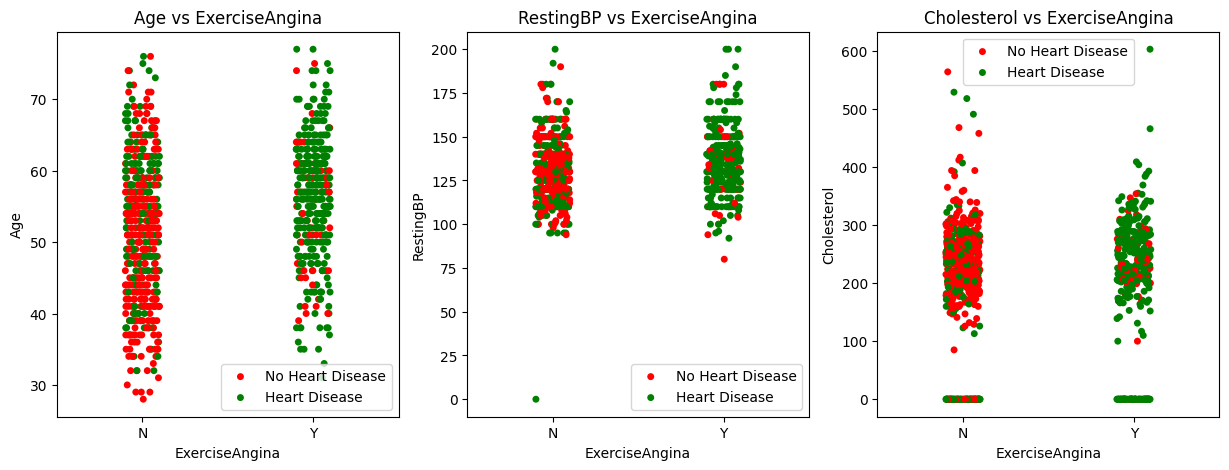

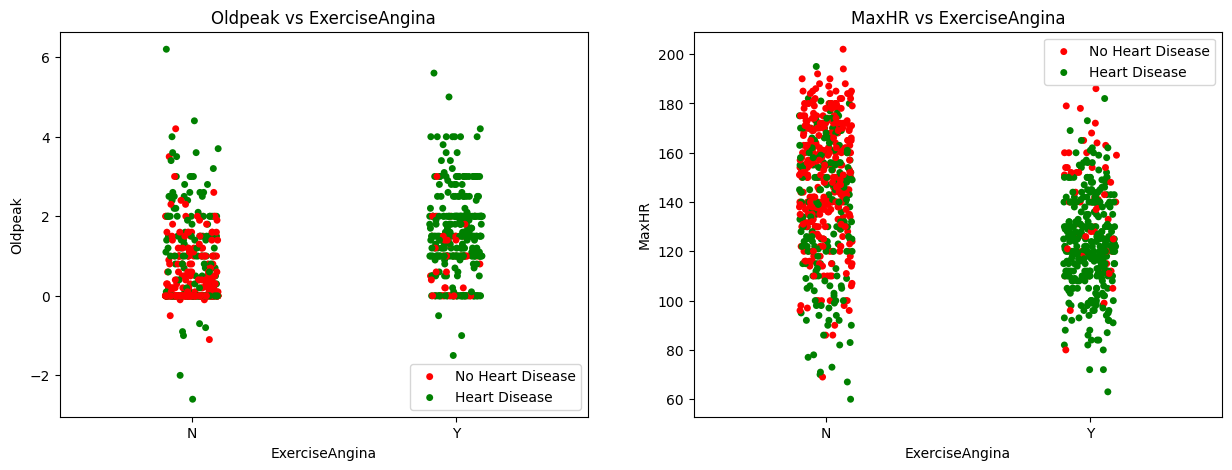

In [52]:
#ExerciseAngina vs Fitur Numerik
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title);

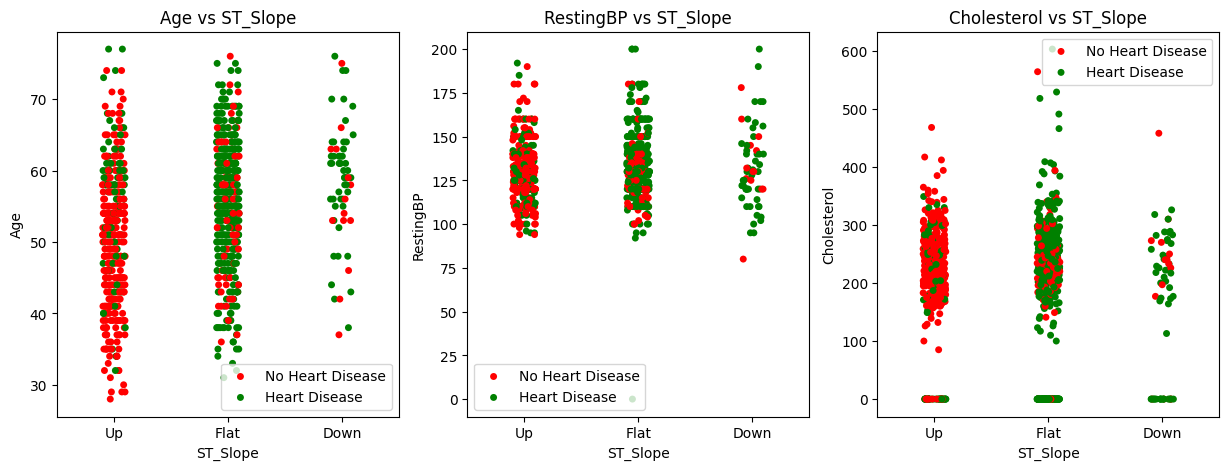

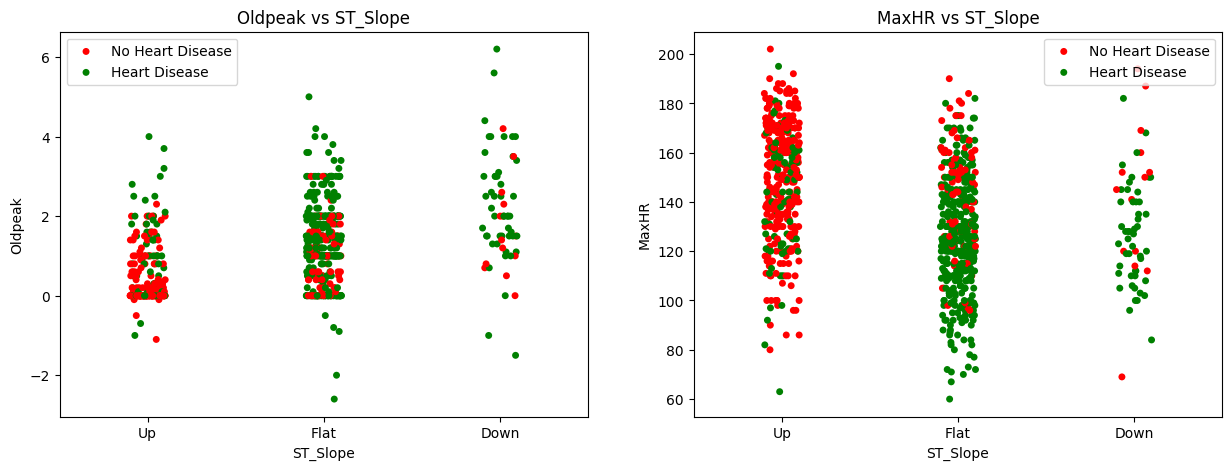

In [53]:
#ST_Slope vs Fitur Numerik
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_features[i],data = data,hue = 'HeartDisease',palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title);

Terdapat pola korelasi positif yang terlihat jelas antara nilai ST_Slope dan jumlah kasus penyakit jantung. Kategori Flat, Down, dan Up menunjukkan tingkat probabilitas diagnosis penyakit jantung secara berurutan, dari yang paling tinggi, sedang, hingga paling rendah.

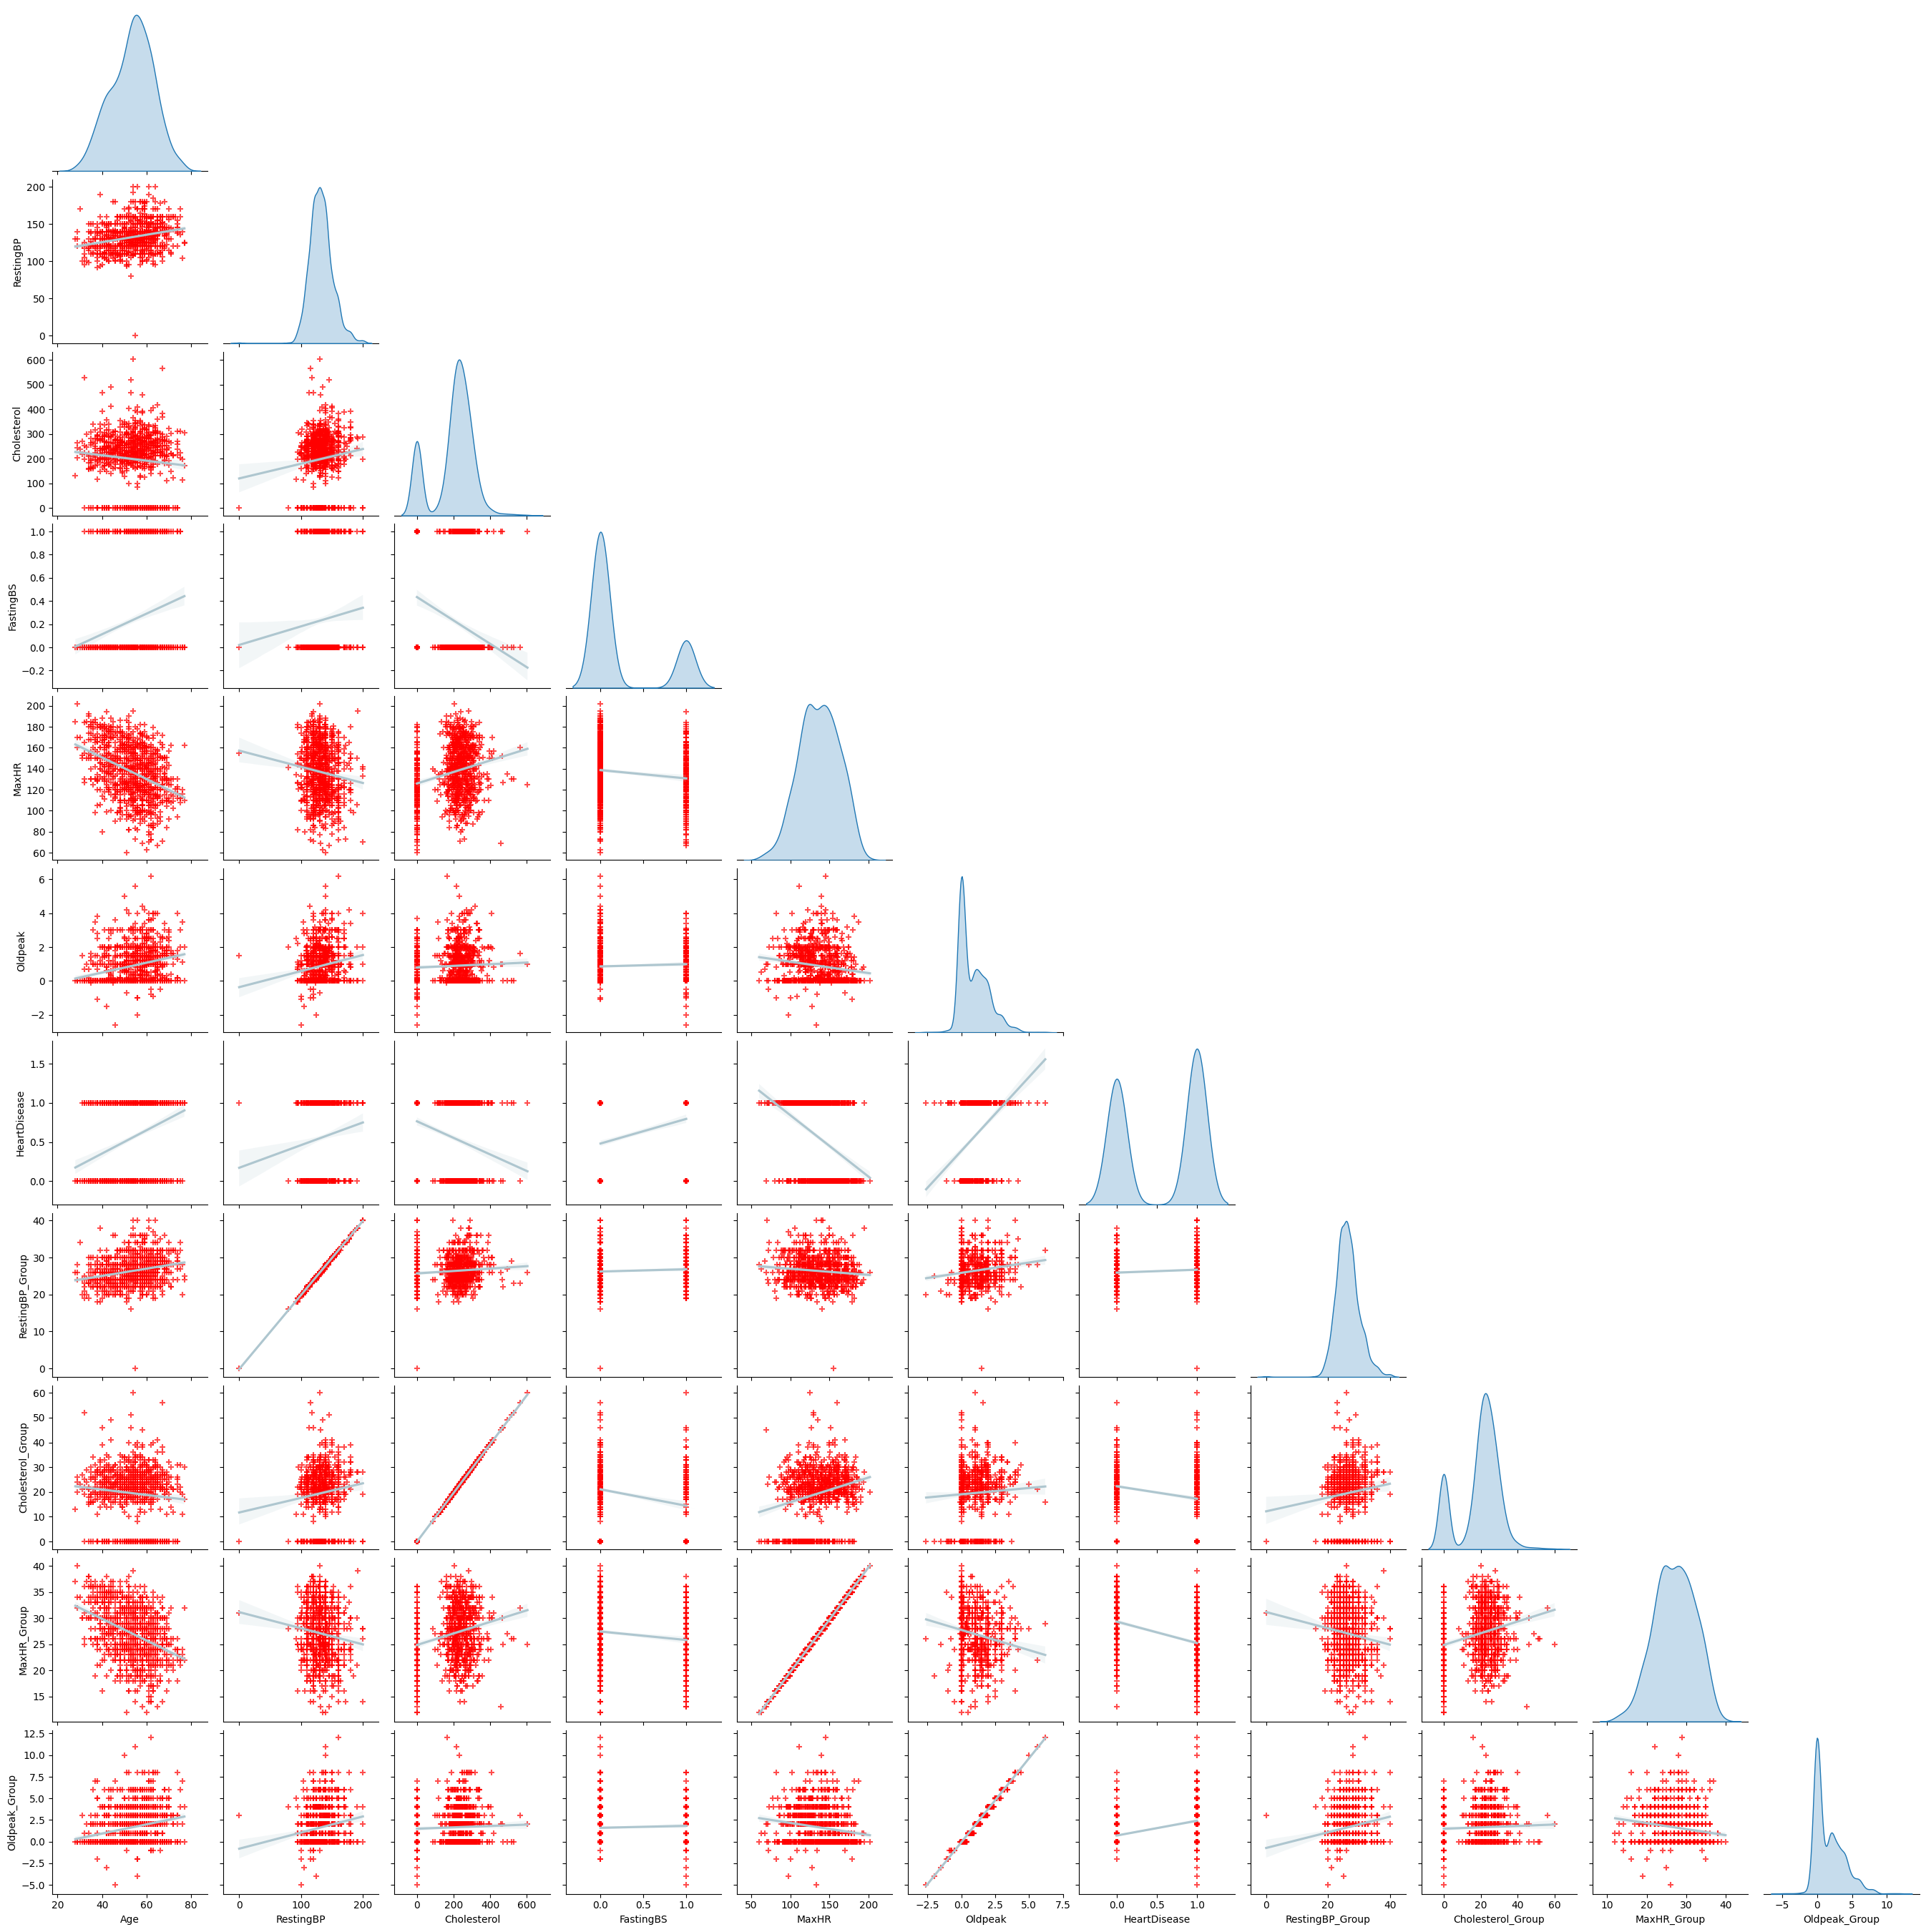

In [55]:
sns.pairplot(data,
             markers="+",
             diag_kind="kde",
             kind='reg',
             plot_kws={'line_kws':{'color':'#aec6cf'},
                       'scatter_kws':{'alpha':0.7,
                                      'color': 'red'}},
             corner=True);

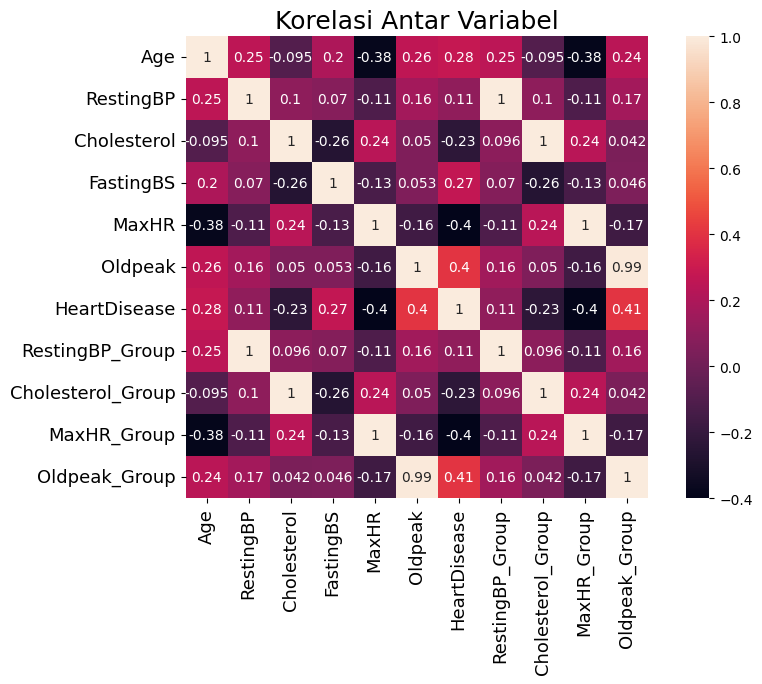

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True,square=True)
plt.title('Korelasi Antar Variabel',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

- Fitur hasil grouping (seperti Oldpeak_Group & Oldpeak) memang sangat berkorelasi karena datanya turunan dari variabel yang sama.
- MaxHR cenderung menurun seiring bertambahnya umur.
- Faktor seperti Oldpeak, FastingBS, dan MaxHR punya pengaruh yang cukup signifikan terhadap risiko penyakit jantung (HeartDisease).
- Korelasi antar sebagian besar fitur relatif lemah (di sekitar -0.1 sampai 0.3), artinya banyak variabel bekerja secara independen.



# **5. Feature Engineering**

In [59]:
#Data Scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0 -1.43    1              1       0.41         0.83          0           1   
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

ini menjelaskan proses transformasi data numerik sebelum dimasukkan ke model machine learning. Model machine learning hanya membaca angka tanpa memahami satuan atau arti nilai. Karena itu, data perlu diproses dengan penskalaan agar sebanding antar fitur.

Terdapat dua metode:

- Normalisasi: untuk data yang distribusinya tidak normal. Contoh: Oldpeak.

- Standardisasi: untuk data berdistribusi normal atau memiliki nilai yang jauh berbeda. Contoh: Usia, RestingBP, Kolesterol, dan MaxHR.

Tujuannya agar algoritma dapat bekerja optimal tanpa dipengaruhi perbedaan skala antar fitur.

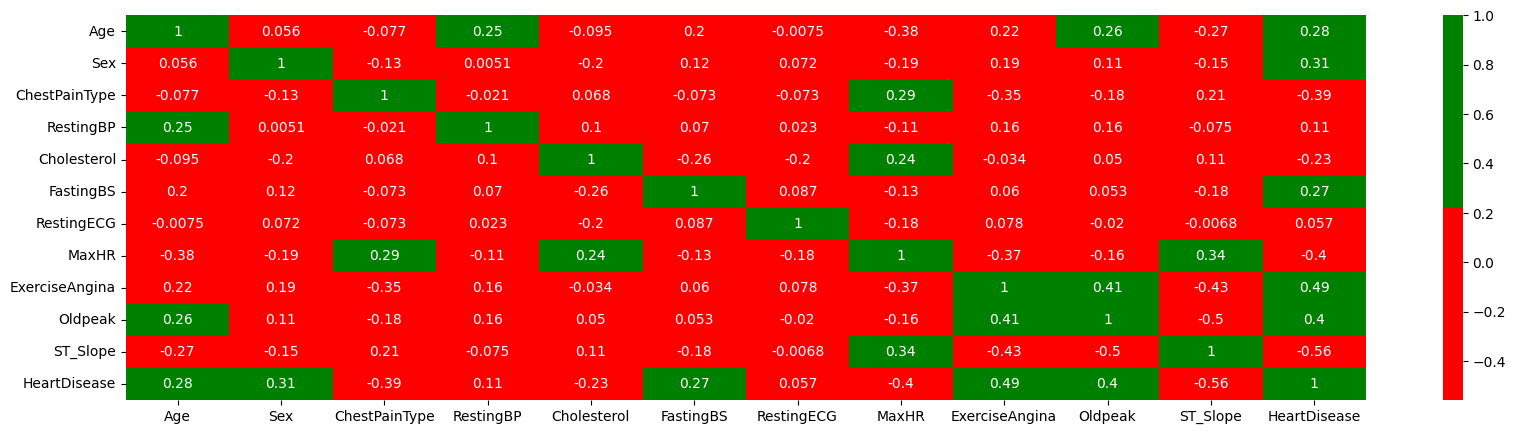

In [60]:
#Matriks Korelasi
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

Nilai korelasi: -1 hingga 1
- Mendekati 1 → hubungan positif kuat
- Mendekati -1 → hubungan negatif kuat
- Mendekati 0 → hubungan lemah

Warna:
- Hijau → korelasi kuat
- Merah → korelasi lemah/negatif

Insight:

- Korelasi negatif kuat dengan HeartDisease:
ST_Slope (-0.56), MaxHR (-0.4), ChestPainType (-0.39)

- Korelasi positif:
ExerciseAngina (0.49), Oldpeak (0.4), Age (0.28)


- Kesimpulannya :
Dari visualisasi ini, bisa dipilih fitur-fitur dengan korelasi paling signifikan terhadap HeartDisease untuk proses modeling selanjutnya, karena tidak semua fitur punya kontribusi yang berarti.

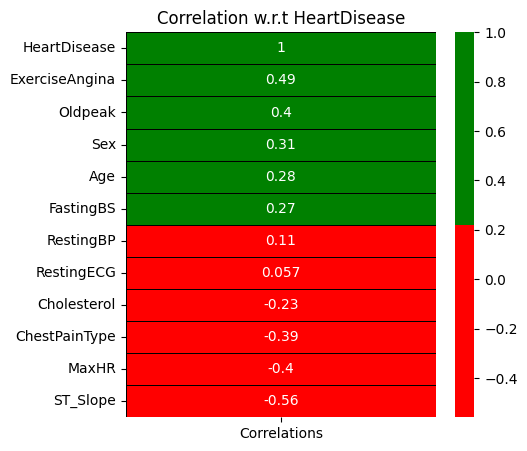

In [61]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

Dari Visualisasi  di atas kecuali RestingBP dan RestingECG, semuanya menunjukkan hubungan positif atau negatif dengan HeartDisease.

In [62]:
# Pemilihan Fitur untuk Fitur Kategorial
# Uji Chi Square
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

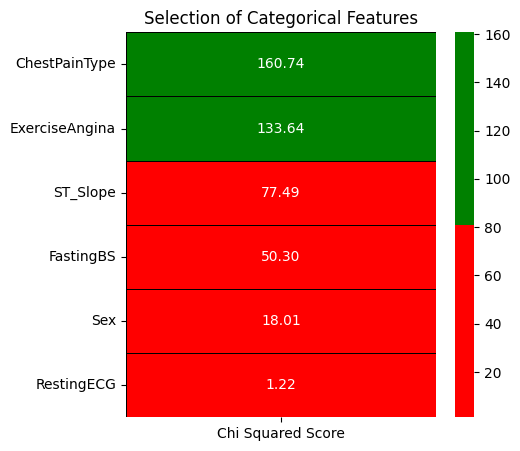

In [63]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- Uji Chi-Square adalah metode statistik untuk mengukur hubungan atau keterkaitan antar dua variabel kategori. Biasanya dipakai untuk menjawab pertanyaan:
"Apakah dua variabel saling berhubungan atau tidak?"

- Misalnya kamu mau tahu apakah jenis nyeri dada (ChestPainType) berpengaruh terhadap status penyakit jantung (HeartDisease).
Karena dua-duanya berupa data kategori, uji Chi-Square bisa menguji apakah distribusi ChestPainType berbeda signifikan antara pasien dengan dan tanpa penyakit jantung.

- Mendefinisikan Gambar
1. ChestPainType (160.74) dan ExerciseAngina (133.64) memiliki skor sangat tinggi → penting untuk model.
2. ST_Slope (77.49) dan FastingBS (50.30) → masih informatif, namun tidak sekuat dua pertama.
3. Sex (18.01) dan RestingECG (1.22) → kurang relevan, kemungkinan bisa dikeluarkan dari model.

Kesimpulannya : Kecuali RestingECG, semua fitur kategoris yang tersisa cukup penting untuk memprediksi penyakit jantung.



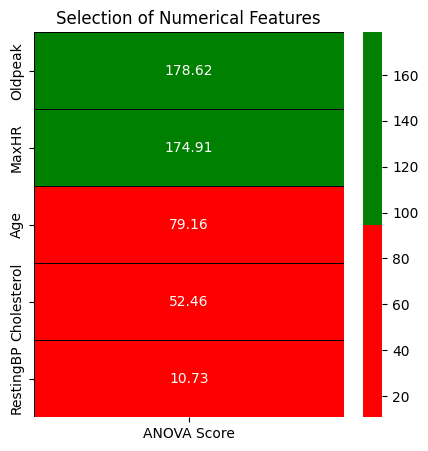

In [64]:
# Pemilihan Fitur untuk Fitur Numerik :¶
# Uji ANOVA :
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- Uji ANOVA dipakai buat ngebuktiin apakah rata-rata suatu fitur numerik beda secara signifikan di beberapa kelompok kategori.

Kesimpulnya:

Gambar ini menunjukkan fitur numerik mana yang paling membantu dalam membuat prediksi. Antara lain :
- Oldpeak dan MaxHR adalah dua fitur numerik paling informatif terhadap variabel target.

- RestingBP adalah fitur numerik paling lemah dan bisa dipertimbangkan untuk dihapus dari model.

Maka kesimpulannya adalah RestingBP akan dikeluarkan dari proses pemodelan, tujuannya agar membantu membuat model machine learning yang lebih efisien dan akurat.


## **6. Modelling (Decision Tree)**

In [113]:
# Import Library
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [114]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2) #fungsi ini dari sklearn digunakan untuk membagi data : 80% data untuk training, 20% data untuk testing

Kode ini bertujuan untuk menyediakan data training dan data testing dari dataset df1, dengan target-nya adalah kolom HeartDisease, dan beberapa fitur tertentu dikeluarkan dari data training karena dianggap tidak relevan atau kurang informatif.

In [124]:
def model(classifier):
    # Training --> Melatih model dengan data latih (x_train, y_train)
    classifier.fit(x_train, y_train)

    # Prediction & Probabilitas --> Memprediksi label dan probabilitas untuk kelas positif (1).
    prediction = classifier.predict(x_test)
    y_score = classifier.predict_proba(x_test)[:, 1]  # Probabilitas kelas positif

    # Evaluasi
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Accuracy : ", '{0:.2%}'.format(accuracy_score(y_test, prediction))) # Akurasi
    print("Cross Validation Score : ", '{0:.2%}'.format(
        cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_auc_score(y_test, y_score)))

    # ROC Curve Manual --> Visualisasi Kurva ROC menampilkan seberapa baik model membedakan kelas positif dan negatif
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Plot')
    plt.legend(loc="lower right")
    plt.show()

    return classifier

# Evaluasi mendalam terhadap prediksi model menggunakan : Confusion Matrix dan Classification Report
def model_evaluation(classifier):

    # Confusion Matrix--> Menghitung jumlah prediksi benar dan salah pada setiap kelas
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    # Visualisasi Heatmap
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report--> Menampilkan metrik : Precision, Recall, F1-score
    print(classification_report(y_test,classifier.predict(x_test)))

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy :  84.78%
Cross Validation Score :  89.09%
ROC_AUC Score :  89.96%


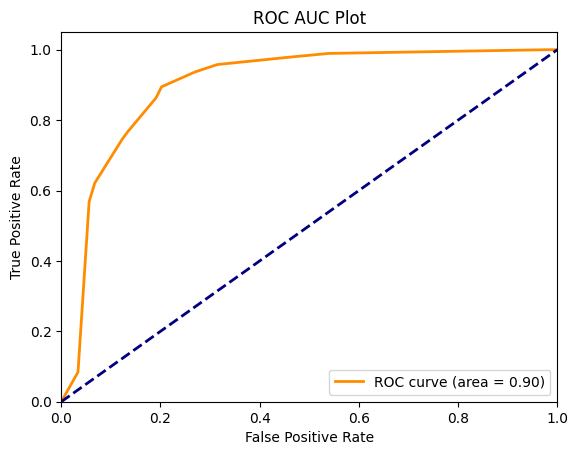

In [128]:
model_DT = model(classifier_dt)

Penjelasan Output Model Klasifikasi
1. Accuracy : 84.78%
Menunjukkan bahwa model mampu memprediksi dengan benar sebanyak 84.78% dari total data uji. Ini adalah metrik dasar untuk mengevaluasi kinerja model.

2. Cross Validation Score : 89.09%
Merupakan hasil validasi silang sebanyak 30 kali (10 fold * 3 repeat) menggunakan metrik ROC AUC. Skor ini menunjukkan bahwa model cukup stabil dan konsisten saat diuji pada data yang berbeda-beda.

3. ROC AUC Score : 89.96%
Ini adalah nilai area di bawah kurva ROC (Receiver Operating Characteristic) yang dihasilkan dari data uji aktual. Skor AUC mendekati 1 menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan negatif.

Penjelasan Grafik ROC AUC Plot
- Kurva oranye adalah kurva ROC model. Semakin melengkung ke kiri atas, semakin baik performa model.

- Garis biru putus-putus adalah baseline (model acak) dengan AUC = 0.5.

- Area di bawah kurva (AUC) sebesar 0.90 menunjukkan bahwa model memiliki kemampuan klasifikasi yang sangat baik. Nilai ini mengonfirmasi hasil metrik sebelumnya.


## **7. Evaluasi Model**


              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



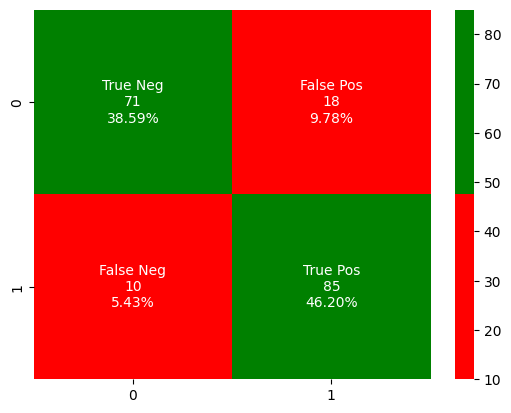

In [129]:
model_evaluation(classifier_dt)

1. Classification Report (Tabel Matriks di Atas)

Keterangan:
- Precision (Presisi): Dari semua prediksi positif, berapa banyak yang benar.
- Recall (Sensitivitas): Dari semua kasus positif, berapa banyak yang berhasil dideteksi.
- F1-score: Harmonik rata-rata precision dan recall. Cocok untuk data tidak seimbang.
- Support: Jumlah data asli dari masing-masing kelas.

2. Confusion Matrix (Matriks Kebingungan)

Penjelasan per sel:
- True Neg (71 / 38.59%): Prediksi benar untuk kelas 0 (tidak sakit jantung).
- False Pos (18 / 9.78%): Salah memprediksi pasien sehat sebagai sakit.
- False Neg (10 / 5.43%): Salah memprediksi pasien sakit sebagai sehat (ini paling kritis).
- True Pos (85 / 46.20%): Prediksi benar untuk kelas 1 (sakit jantung).

Kesimpulan :

Model klasifikasi decision tree yang dibangun:
- Memiliki akurasi baik (85%)
- Sensitivitas tinggi terhadap kasus positif (Recall = 89%)
- Sedikit salah memprediksi kasus positif sebagai negatif (FN = 10 kasus / 5%), yang perlu diminimalkan terutama dalam diagnosis penyakit.

# **8. Inference model dengan data baru**

In [131]:
# Input data baru dari user
Age = float(input('Input Age: '))
Sex = int(input('Input Sex (0=Perempuan, 1=Laki-laki): '))
ChestPainType = int(input('Input Chest Pain Type (0-3): '))
Cholesterol = float(input('Input Cholesterol: '))
FastingBS = int(input('Input Fasting Blood Sugar (0=Normal, 1=≥126 mg/dL): '))
MaxHR = float(input('Input Max Heart Rate: '))
Oldpeak = float(input('Input Oldpeak: '))
ExerciseAngina = int(input('Input Exercise Angina (0=Tidak, 1=Ya): '))
ST_Slope = int(input('Input ST Slope (0-2): '))


# Susun jadi array 2D
data_baru = [[Age, Sex, ChestPainType, Cholesterol, FastingBS, MaxHR, Oldpeak, ExerciseAngina, ST_Slope]]

# Prediksi kelas
hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

# Tampilkan hasil
if hasil_prediksi == 0:
    print('\nTidak berpotensi menderita penyakit jantung!')
else:
    print('\nBerpotensi menderita penyakit jantung!')

# (Opsional) Prediksi probabilitas kalau model mendukung
if hasattr(model_DT, 'predict_proba'):
    probabilitas = model_DT.predict_proba(data_baru)
    print(f"\nProbabilitas Tidak Jantung: {probabilitas[0][0]:.2%}")
    print(f"Probabilitas Jantung: {probabilitas[0][1]:.2%}")


Input Age: 52
Input Sex (0=Perempuan, 1=Laki-laki): 0
Input Chest Pain Type (0-3): 3
Input Cholesterol: 20
Input Fasting Blood Sugar (0=Normal, 1=≥126 mg/dL): 126
Input Max Heart Rate: 10
Input Oldpeak: 10
Input Exercise Angina (0=Tidak, 1=Ya): 1
Input ST Slope (0-2): 2

Berpotensi menderita penyakit jantung!

Probabilitas Tidak Jantung: 0.00%
Probabilitas Jantung: 100.00%
